### <p style="text-align: right;"> &#9989; Andrew Koren</p>

## Brownian motion

One large particle. Many DoF, many fast and few slow particles.

Explicit solvent models everything, but we're really only concerned with the particle with brownian motion


Desired properties: <br>
a) $\vec v = 0 \Rightarrow$ solvent should transfer momentum to heavy particle <br>
b) Fast heavy particle has friction effects

Brownian dynamics Langevin equation

$$
\langle \vec r (t) \rangle = 0\\
\langle \vec r^2 (t) \rangle = 2d Dt
$$

$D$ is an input

$$
m \frac{d\vec v}{dt} = -\vec \nabla V(\vec r)
$$
But it goes to zero in a one-particle or non-interacting system

With random force: (see Stratonovich/Ito)
$$
m \frac{d\vec v}{dt} = -\vec \nabla V(\vec r) - \zeta \vec v + \vec R
$$
$\zeta$ is the friction coefficient, $\frac{m}{\zeta} $ is the characteristic time scale

Constraints:
$$
\langle \vec R \rangle = 0 \\
\langle \vec R (t) \vec R(t+s ) \rangle = \langle R^2 (t) \rangle \phi (s) \\
= \langle R^2 \rangle \delta (s)
$$
keeps $s=0$?

$$
\langle \vec R (t) \cdot \vec r(s) \rangle = 0 \\
\langle \vec R (t) \cdot \vec v (s) \rangle = 0, t>s 
$$
Step

Multiplying the original equation by $\vec r(t)$ & taking the average
$$
\frac {d^2}{dt^2} = \frac{d}{dt} \left(2\vec r \frac{d\vec r}{dt} \right) = 2 \left(\frac{d \vec r}{dt} \right)^2 + 2\vec r \frac{d^2 \vec r}{dt^2} \\

\frac{m}{2} \left\langle \frac{d^2}{dt^2 } \vec r^2 \right \rangle - m \langle \vec v^2 \rangle = \frac{\zeta}{2} \left \langle \frac{d\vec r^2}{dt} \right \rangle \\
m\langle \vec v^2 \rangle = d k_B T

$$
This gives us our 1st order equation

$$
\frac{m}{2} \frac{d^2}{dt^2} \langle \vec r^2 (t) \rangle + \frac{\zeta}{2} \frac{d}{dt} \underset{y(t)}{\langle \vec r^2 (t) \rangle} = dk_B T \\
y' + \frac{\zeta}{M} y = \underset{h(t)}{\frac{2dk_B T}{M}} \vec r(t) \\
$$
The solution is
$$
y(t) = Ce^{-\gamma t} + e^{-\gamma t} \int_0^t dt' e^{\gamma t'} h(t') \\
\gamma = \frac{\zeta }{m} \\
y(0) = \langle \vec r(0) \cdot \vec v(0) \rangle = 0 \Rightarrow C=0 \\
\langle r^2 (t) \rangle = \int y(t) dt = \frac{2dk_B T}{\zeta} \left( t+ \frac{ e^{-\gamma t}}{\gamma} + C_2\right)
$$

Result (trust me bro):

$$
\langle r^2(t) \rangle = \frac{2dk_B T}{\zeta} t + \frac{2dk_B T m}{\zeta^2} \left( e^{- \gamma t}-1\right) \\
D = \frac{k_B T}{\zeta} \\
t \gg \frac{1}{\gamma}= \frac{m}{\zeta}
$$

Fluctuation-dissipation theorem:

$$
\langle R_i (t) R_j (t') \rangle = 2k_B T \zeta \delta_{ij} d(t-t')
$$

$$
\langle F_i^2 \rangle = \frac{2k_B T \zeta}{\Delta T} \\
\vec v (t + \Delta t) = (1-\gamma \Delta t) \vec v(t) + \frac{1}{m} \vec F_R \Delta t \\
\vec r (t+ \Delta t) = \vec r(t) + \vec v(t + \Delta t) \Delta t
$$


# PHY480 Day 25

## In-class assignment: Brownian dynamics simulations

In this in-class assignment we consider Brownian dynamics modeled with the Langevin equation for a single degree of freedom.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**Task 1.** Implement random force for Langevin equation with the variance

$$
\langle \vec{F}^2\rangle=\frac{2dT\zeta}{\Delta t},
$$

where $d$ is dimensionality, $T$ temperature, $\zeta$ the friction coefficient and $\Delta t$ the integration step size. Implement for $N$ particles, so you can run a simulation for $N$ non-interacting particles.


In [46]:
# generate random forces for Langevin equation
# Input:
# f -- force array of size N * d, N -- number of particles, d -- dimensionality
# fstd -- standard deviation to generate the forces
# Output:
# the input f is changed
def random_forces( f, fstd ):
    f[:] = np.random.normal(0, fstd, size=f.shape)

def initial_r( lbox, r ):
    r[:] = np.random.rand(*r.shape) * lbox

def initial_v( lbox, v, T, masses ):
    sigma = np.sqrt(T/masses)
    v[:] = np.random.randn(*v.shape)  * sigma
    v_cm = np.sum(masses * v, axis=0) / sum(masses)
    v[:] -= v_cm

**Task 2.** Implement simple Euler integrator scheme for the Langevin equation.


In [16]:
# propagate v and r by dt
# Input:
# r, v -- positions and velocities, N*d
# f -- random forces, N*d
# zeta -- friction coefficient
# masses -- array with masses
# dt -- step size
# Output:
# inputs r, v changed
def update_v_r( r, v, f, zeta, masses, dt ):
    v[:] += (- zeta * v + f)*dt/(2*masses)
    r[:] += v*dt
    v[:] += (- zeta * v + f)*dt/(2*masses)


**Task 3.** Implement a Brownian dynamics simulation with the Langevin equation for $N$ non-interacting particles. You can initialize particles in the box (you do not need to check their distance since the particles are non-interacting), but do not use any boundary conditions, so that the particles can drift away freely from their initial positions.

In [74]:
### main parameters

# dimension
dim = 2

# number of particles
N = 10 # increase once the code is working properly

# particle radius (for plotting)
radius = 0.5

# box sizes (the size of this array should match "dim"),
# to simplify, box size should be >= 2*rcut
lbox = np.array( [8.0,8.0] )

# allocate arrays for the position r and velocity v,
# the first index is particle index and the second is the vector component
r = np.zeros( (N,dim) )
v = np.zeros( (N,dim) )

# allocate array for the forces
f = np.zeros( (N,dim) )

# array with masses (set to 1 for now)
masses = np.full( N, 1 )
masses = np.array([[m] for m in masses])

# for reproducibility
np.random.seed(2)

# time step
dt = 0.01

# temperature
Temp = 1000

# number of simulation steps
Time = 10
Nsim = int(Time/dt)
Ninner = 1

# friction
zeta = 10

fstd = np.sqrt(2*dim*Temp*zeta/dt)

In [75]:
initial_r(lbox, r)
initial_v(lbox, v, Temp, masses)


r_storage = np.zeros([Nsim,*r.shape])
for i in range(Nsim):
    for j in range(Ninner):
        update_v_r(r, v, f, zeta, masses, dt)
    r_storage[i] = r


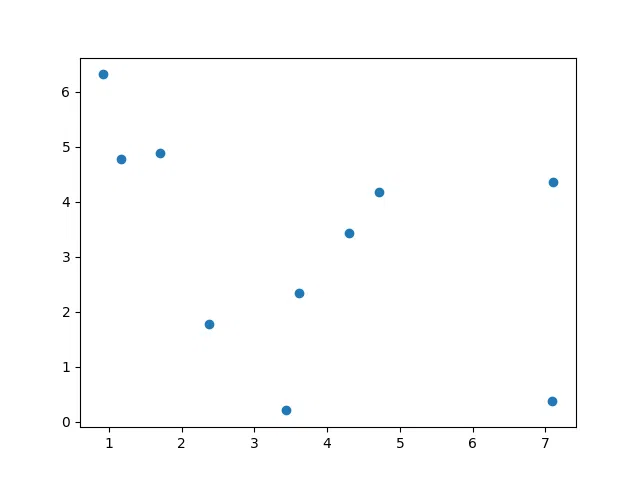

In [76]:
from animator import ParticleAnimator
from matplotlib.animation import PillowWriter
output_file = 'brownian.webp'

# Plotting #
fig, ax = plt.subplots(1,1)
particles = ax.scatter(r_storage[0,:,0], r_storage[0,:,1])
def update_particles(ax, frame_data):
    particles.set_offsets(frame_data)

# Animating #
anim = ParticleAnimator(fig, PillowWriter, output_file)
anim.set_display(30, Time)
particle_frames = anim.generate_frame_data(r_storage)
anim.animate_ax(ax, update_particles, particle_frames)

# Run Animation #
anim.make_animation()

plt.close()
anim.display()


**Task 4.** Calculate the mean squared displacement $\langle r^2(t)\rangle$ as function of time and check if it matches the theoretical expectations.

[0.1]


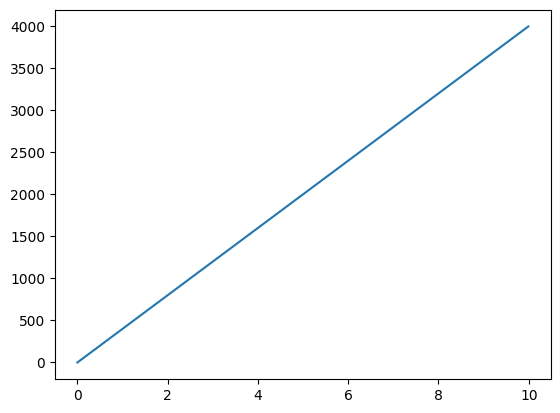

In [77]:
# Theoretical
t = np.arange(0, Time, dt)
r2 = 2*dim*Temp/zeta*t + 2*dim*t*masses[0]/(zeta**2) * (np.exp(-zeta/masses[0]*t)-1)


plt.plot(t, r2)

print(masses[0]/zeta)


&#169; Copyright 2025,  Michigan State University Board of Trustees